In [1]:
seed_value= 30
import numpy as np
np.random.seed(seed_value)
import matplotlib.pyplot as plt
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import cv2
from tqdm import tqdm
from random import shuffle
import random
random.seed(seed_value)

In [2]:
DATADIR = "F:\\IIT KANPUR MTECH STUDY MATERIAL\\THESIS\\Data  of Dyslexic and Non Dyslexic Children in Hindi\\Both Data"
#DATADIR = "F:\IIT KANPUR MTECH STUDY MATERIAL\THESIS\Data  of Dyslexic and Non Dyslexic Children in Hindi\Both Data"
CATEGORIES = ["Dyslexia", "Non Dyslexia"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        #plt.imshow(img_array, cmap='gray')  # graph it
        #plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!
    

In [3]:
IMG_SIZE =30

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#plt.imshow(new_array, cmap='gray')
#plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dyslexia 1=non dyslexia

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

print(len(training_data))
#print(training_data)

100%|██████████| 41/41 [00:00<00:00, 186.94it/s]

83


In [5]:
import random

random.shuffle(training_data)
#for sample in training_data[:17]:
   # print(sample[1])

In [6]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X.shape)
print(y)

(83, 30, 30, 1)
[1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]


In [7]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [135]:
import tensorflow as tf
tf.set_random_seed(seed_value)
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:],activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4,seed=seed_value))#first Drop rate =0.9
#model.add(Dropout(0.3))

model.add(Dense(10, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4,seed=seed_value))#first Drop rate =0.9 
#model.add(Dropout(0.3))

model.add(Dense(1, activation = 'sigmoid'))
#model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model_history=model.fit(X_train, y_train, epochs=300, validation_split=0.1)
#model_history=model.fit(X, y, epochs=100, validation_split=0.1)

Train on 59 samples, validate on 7 samples
Epoch 1/300
59/59 [==============================] - 8s 129ms/sample - loss: 0.5976 - acc: 0.7288 - val_loss: 0.6445 - val_acc: 0.5714
Epoch 2/300
59/59 [==============================] - 1s 16ms/sample - loss: 0.1789 - acc: 0.9492 - val_loss: 0.7055 - val_acc: 0.5714
Epoch 3/300
59/59 [==============================] - 1s 16ms/sample - loss: 0.2145 - acc: 0.9322 - val_loss: 0.7425 - val_acc: 0.5714
Epoch 4/300
59/59 [==============================] - 1s 15ms/sample - loss: 0.1894 - acc: 0.9661 - val_loss: 0.7554 - val_acc: 0.5714
Epoch 5/300
59/59 [==============================] - 1s 16ms/sample - loss: 0.1875 - acc: 0.9492 - val_loss: 0.7594 - val_acc: 0.5714
Epoch 6/300
59/59 [==============================] - 1s 15ms/sample - loss: 0.1087 - acc: 1.0000 - val_loss: 0.7504 - val_acc: 0.5714
Epoch 7/300
59/59 [==============================] - 1s 14ms/sample - loss: 0.1273 - acc: 0.9661 - val_loss: 0.7395 - val_acc: 0.5714
Epoch 8/300
59/59 

59/59 [==============================] - 1s 15ms/sample - loss: 0.0292 - acc: 1.0000 - val_loss: 1.5981 - val_acc: 0.5714
Epoch 62/300
59/59 [==============================] - 1s 15ms/sample - loss: 0.0625 - acc: 0.9831 - val_loss: 1.6366 - val_acc: 0.5714
Epoch 63/300
59/59 [==============================] - 1s 15ms/sample - loss: 0.0493 - acc: 1.0000 - val_loss: 1.7194 - val_acc: 0.5714
Epoch 64/300
59/59 [==============================] - 1s 14ms/sample - loss: 0.0366 - acc: 1.0000 - val_loss: 1.7857 - val_acc: 0.5714
Epoch 65/300
59/59 [==============================] - 1s 14ms/sample - loss: 0.0406 - acc: 1.0000 - val_loss: 1.8259 - val_acc: 0.5714
Epoch 66/300
59/59 [==============================] - 1s 14ms/sample - loss: 0.0367 - acc: 1.0000 - val_loss: 1.8734 - val_acc: 0.5714
Epoch 67/300
59/59 [==============================] - 1s 13ms/sample - loss: 0.0280 - acc: 1.0000 - val_loss: 1.8997 - val_acc: 0.5714
Epoch 68/300
59/59 [==============================] - 1s 14ms/sample

59/59 [==============================] - 1s 14ms/sample - loss: 0.0157 - acc: 1.0000 - val_loss: 2.7207 - val_acc: 0.5714
Epoch 122/300
59/59 [==============================] - 1s 14ms/sample - loss: 0.0192 - acc: 1.0000 - val_loss: 2.7099 - val_acc: 0.5714
Epoch 123/300
59/59 [==============================] - 1s 14ms/sample - loss: 0.0333 - acc: 1.0000 - val_loss: 2.7143 - val_acc: 0.5714
Epoch 124/300
59/59 [==============================] - 1s 14ms/sample - loss: 0.0162 - acc: 1.0000 - val_loss: 2.7004 - val_acc: 0.5714
Epoch 125/300
59/59 [==============================] - 1s 14ms/sample - loss: 0.0181 - acc: 1.0000 - val_loss: 2.6798 - val_acc: 0.5714
Epoch 126/300
59/59 [==============================] - 1s 14ms/sample - loss: 0.0321 - acc: 1.0000 - val_loss: 2.6498 - val_acc: 0.5714
Epoch 127/300
59/59 [==============================] - 1s 14ms/sample - loss: 0.0273 - acc: 1.0000 - val_loss: 2.5896 - val_acc: 0.5714
Epoch 128/300
59/59 [==============================] - 1s 14ms

59/59 [==============================] - 1s 17ms/sample - loss: 0.0148 - acc: 1.0000 - val_loss: 1.9321 - val_acc: 0.5714
Epoch 182/300
59/59 [==============================] - 1s 17ms/sample - loss: 0.0133 - acc: 1.0000 - val_loss: 1.9671 - val_acc: 0.5714
Epoch 183/300
59/59 [==============================] - 1s 16ms/sample - loss: 0.0157 - acc: 1.0000 - val_loss: 1.9593 - val_acc: 0.5714
Epoch 184/300
59/59 [==============================] - 1s 17ms/sample - loss: 0.0100 - acc: 1.0000 - val_loss: 1.9217 - val_acc: 0.5714
Epoch 185/300
59/59 [==============================] - 1s 19ms/sample - loss: 0.0169 - acc: 1.0000 - val_loss: 1.8830 - val_acc: 0.5714
Epoch 186/300
59/59 [==============================] - 1s 18ms/sample - loss: 0.0144 - acc: 1.0000 - val_loss: 1.8547 - val_acc: 0.5714
Epoch 187/300
59/59 [==============================] - 1s 15ms/sample - loss: 0.0249 - acc: 1.0000 - val_loss: 1.8304 - val_acc: 0.5714
Epoch 188/300
59/59 [==============================] - 1s 14ms

59/59 [==============================] - 3s 53ms/sample - loss: 0.0063 - acc: 1.0000 - val_loss: 0.3491 - val_acc: 0.8571
Epoch 242/300
59/59 [==============================] - 3s 58ms/sample - loss: 0.0086 - acc: 1.0000 - val_loss: 0.3148 - val_acc: 0.8571
Epoch 243/300
59/59 [==============================] - 3s 56ms/sample - loss: 0.0062 - acc: 1.0000 - val_loss: 0.2789 - val_acc: 0.8571
Epoch 244/300
59/59 [==============================] - 4s 60ms/sample - loss: 0.0145 - acc: 1.0000 - val_loss: 0.2538 - val_acc: 0.8571
Epoch 245/300
59/59 [==============================] - 3s 59ms/sample - loss: 0.0063 - acc: 1.0000 - val_loss: 0.2333 - val_acc: 0.8571
Epoch 246/300
59/59 [==============================] - 4s 64ms/sample - loss: 0.0058 - acc: 1.0000 - val_loss: 0.2146 - val_acc: 0.8571
Epoch 247/300
59/59 [==============================] - 1s 22ms/sample - loss: 0.0086 - acc: 1.0000 - val_loss: 0.2047 - val_acc: 0.8571
Epoch 248/300
59/59 [==============================] - 1s 21ms

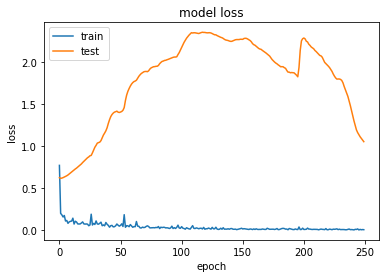

In [133]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss_vs_epochs.png')
plt.show()


In [134]:
# Predicting the Test set results
#y_pred = model.predict(X)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)
print(y_test)
#print(y)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#cm = confusion_matrix(y, y_pred)
print(cm)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
#score=accuracy_score(y_pred,y)
print(score)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
#print(classification_report(y, y_pred))

[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]]
[0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]
[[10  0]
 [ 7  0]]
0.5882352941176471
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        10
           1       0.00      0.00      0.00         7

    accuracy                           0.59        17
   macro avg       0.29      0.50      0.37        17
weighted avg       0.35      0.59      0.44        17



F:\Anaconda\envs\keras_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_132 (Bat (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
batch_normalization_133 (Bat (None, 12, 12, 128)       512       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 4608)            

In [22]:
#hyperparameter tuning
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
def create_model(init_mode='uniform'):
    # define model
    model = Sequential()
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=784)) 
    model.add(Dropout(0.1))
    model.add(Dense(64, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(10, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

model_CV = KerasClassifier(build_fn=create_model, epochs=200, verbose=1)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 
             'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

TypeError: can't pickle _thread.RLock objects

In [63]:
import statistics

statistics.stdev([59,82,70,59,94,94,70,94,100,100,70,82,100,64,100,64,100,70,70,100])


15.897368203242753